In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
from prettytable import PrettyTable
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go

# Sklearn models to compare
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Warnings
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [237]:
# Read in data and display a sample, drop two additional index columns
us_wildfires = pd.read_csv("FW_Veg_Rem_Combined.csv")
us_wildfires.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

print(us_wildfires.shape)
us_wildfires.head()

(55367, 41)


fire_name  fire_size fire_size_class   stat_cause_descr   latitude  \
0       NaN       10.0               C  Missing/Undefined  18.105072   
1       NaN        3.0               B              Arson  35.038330   
2       NaN       60.0               C              Arson  34.947800   
3    WNA  1        1.0               B     Debris Burning  39.641400   
4       NaN        2.0               B      Miscellaneous  30.700600   

    longitude state disc_clean_date cont_clean_date discovery_month  ...  \
0  -66.753044    PR       2/11/2007             NaN             Feb  ...   
1  -87.610000    TN      12/11/2006             NaN             Dec  ...   
2  -88.722500    MS       2/29/2004             NaN             Feb  ...   
3 -119.308300    NV        6/6/2005        6/6/2005             Jun  ...   
4  -90.591400    LA       9/22/1999             NaN             Sep  ...   

  Wind_cont Hum_pre_30 Hum_pre_15  Hum_pre_7   Hum_cont Prec_pre_30  \
0  3.250413  78.216590  76.793750  76.381579  78.724370         0.0   
1  2.122320  70.840000  65.858911  55.505882  81.682678        59.8   
2  3.369050  75.531629  75.868613  76.812834  65.063800       168.8   
3  0.000000  44.778429  37.140811  35.353846   0.000000        10.4   
4 -1.000000  -1.000000  -1.000000  -1.000000  -1.000000        -1.0   

  Prec_pre_15  Prec_pre_7  Prec_cont  remoteness  
0         0.0         0.0        0.0    0.017923  
1         8.4         0.0       86.8    0.184355  
2        42.2        18.1      124.5    0.194544  
3         7.2         0.0        0.0    0.487447  
4        -1.0        -1.0       -1.0    0.214633  

[5 rows x 41 columns]

## EDA

In [238]:
# Look at shape, data types, null values, and statistics of numerical values
us_wildfires.shape
'''
print(us_wildfires.dtypes, '\n')
print(us_wildfires.isna().sum())
'''

"\nprint(us_wildfires.dtypes, '\n')\nprint(us_wildfires.isna().sum())\n"

In [239]:
us_wildfires.describe()

fire_size      latitude     longitude  disc_pre_year  \
count   55367.000000  55367.000000  55367.000000   55367.000000   
mean     2104.645161     36.172866    -94.757971    2003.765474   
std     14777.005364      6.724348     15.878194       6.584889   
min         0.510000     17.956533   -165.936000    1991.000000   
25%         1.200000     32.265960   -102.541513    1999.000000   
50%         4.000000     34.600000    -91.212359    2005.000000   
75%        20.000000     38.975235    -82.847500    2009.000000   
max    606945.000000     69.849500    -65.285833    2015.000000   

          dstation_m  wstation_wban  wstation_byear  wstation_eyear  \
count   55367.000000   55367.000000    55367.000000    55367.000000   
mean    40256.474678   61029.607311     1979.341900     2015.480990   
std     25272.081410   40830.393541       23.372803        6.767851   
min         6.166452     100.000000     1931.000000     1993.000000   
25%     21373.361515   13927.000000     1973.000000     2010.000000   
50%     35621.334820   73803.000000     1978.000000     2020.000000   
75%     53985.904315   99999.000000     2004.000000     2020.000000   
max    224153.661800   99999.000000     2014.000000     2020.000000   

         Vegetation      fire_mag  ...     Wind_cont    Hum_pre_30  \
count  55367.000000  55367.000000  ...  55367.000000  55367.000000   
mean      11.066068      9.414366  ...      1.132284     40.781796   
std        5.595719     26.820363  ...      2.030611     31.086856   
min        0.000000      0.100000  ...     -1.000000     -1.000000   
25%        9.000000      0.100000  ...     -1.000000     -1.000000   
50%       12.000000      0.100000  ...      0.000000     55.657480   
75%       15.000000      1.000000  ...      2.848603     67.384352   
max       16.000000    100.000000  ...     24.200000     96.000000   

         Hum_pre_15     Hum_pre_7      Hum_cont   Prec_pre_30   Prec_pre_15  \
count  55367.000000  55367.000000  55367.000000  55367.000000  55367.000000   
mean      38.453935     37.001865     25.056738     26.277046     11.654253   
std       31.042541     30.827885     31.187638    112.050198     56.920510   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       51.753846     48.230769      0.000000      0.000000      0.000000   
75%       65.911469     64.645296     60.193606     18.900000      3.600000   
max       94.000000     96.000000     94.000000  13560.800000   2527.000000   

         Prec_pre_7     Prec_cont    remoteness  
count  55367.000000  55367.000000  55367.000000  
mean       4.689920     15.590440      0.236799  
std       31.205327     59.757113      0.144865  
min       -1.000000     -1.000000      0.000000  
25%       -1.000000     -1.000000      0.137800  
50%        0.000000      0.000000      0.202114  
75%        0.000000      0.000000      0.284782  
max     1638.000000   2126.000000      1.000000  

[8 rows x 27 columns]

<AxesSubplot:xlabel='fire_size', ylabel='Count'>

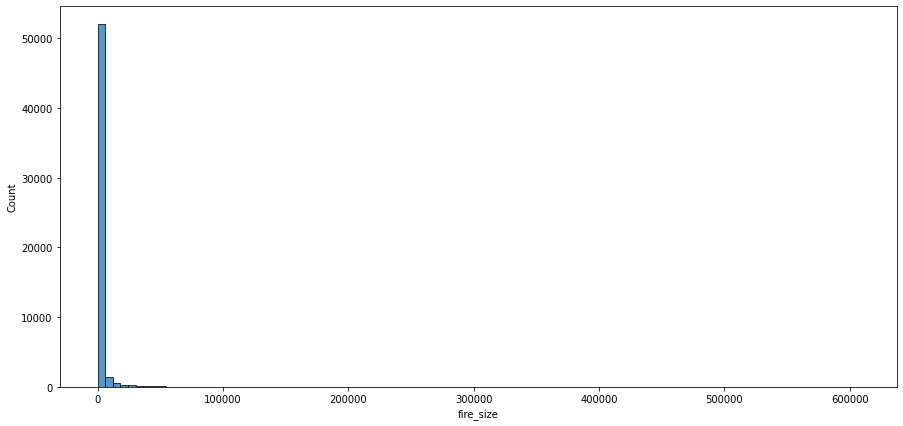

In [240]:
%matplotlib inline
# Histogram of target (fire_size)
plt.figure(figsize=(15,7))
sns.histplot(data=us_wildfires, x='fire_size', bins=100)

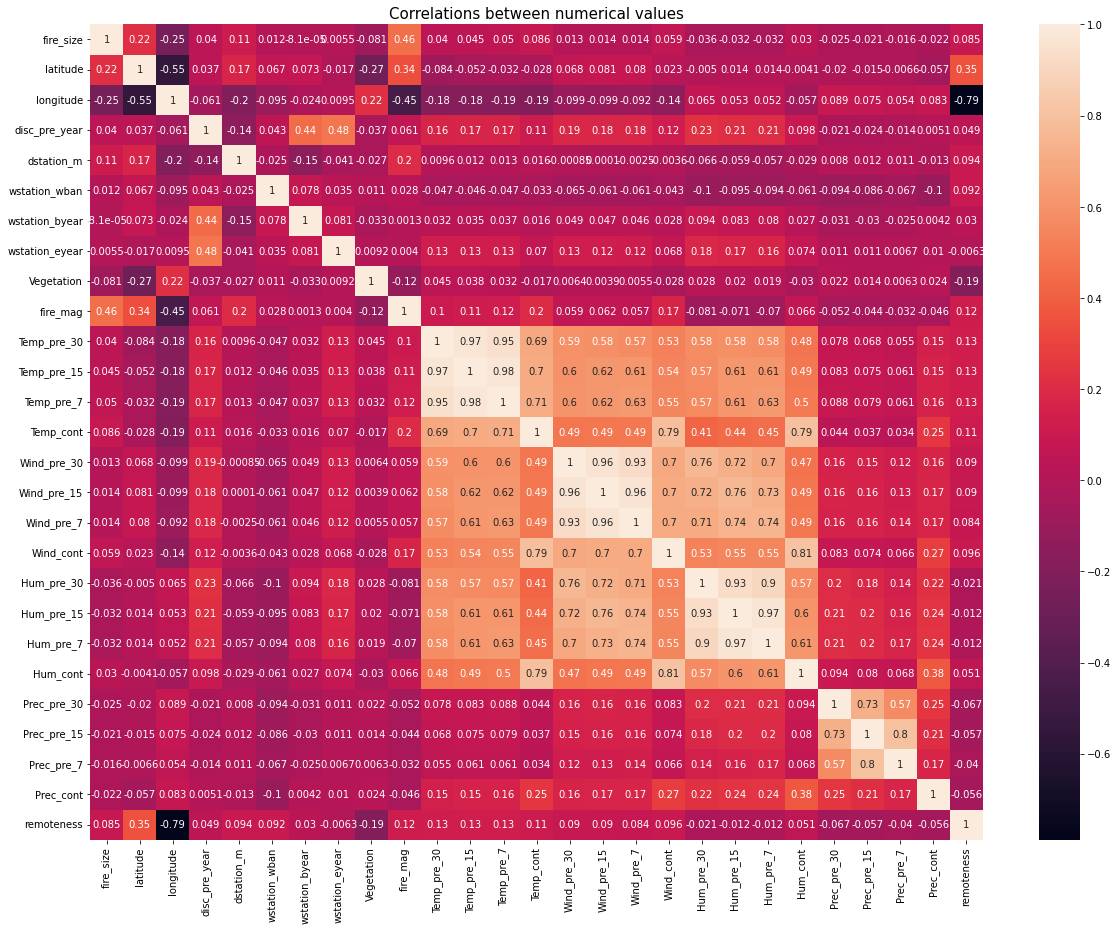

In [241]:
%matplotlib inline

# Any values correlated to one another?
plt.figure(figsize=(20, 15))
us_wildfires_corr = us_wildfires.corr()
sns.heatmap(us_wildfires_corr, annot=True)
plt.title('Correlations between numerical values', size=15);

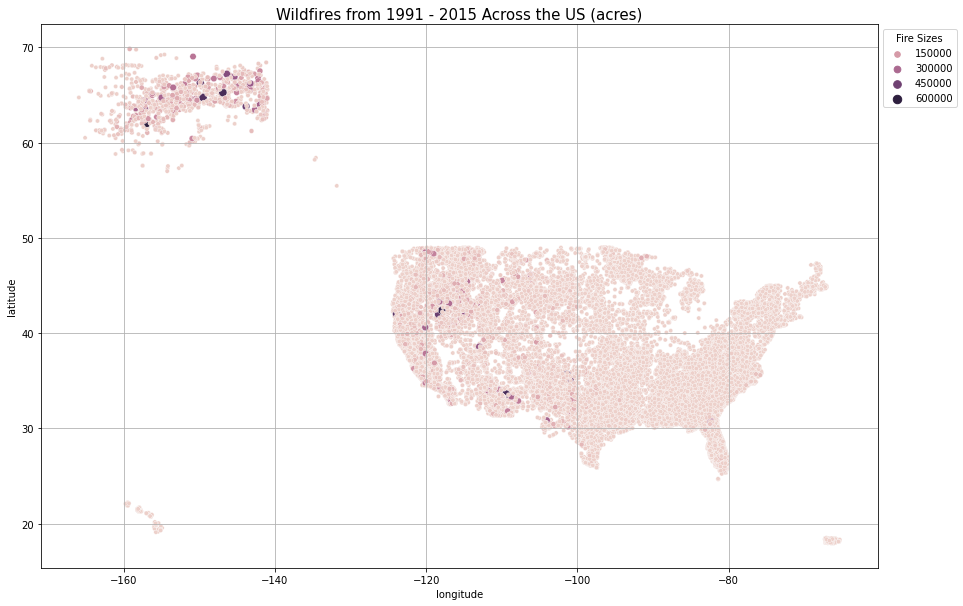

In [242]:
# Plot areas that experience the most fires with the UNSCALED lat and lon from original df
plt.figure(figsize=(15, 10))
sns.scatterplot(data=us_wildfires, x='longitude', y='latitude', size='fire_size', hue='fire_size', alpha=1)
plt.legend(title="Fire Sizes", bbox_to_anchor=(1, 1),
           loc="upper left")
plt.title("Wildfires from 1991 - 2015 Across the US (acres)", size=15)
plt.grid()

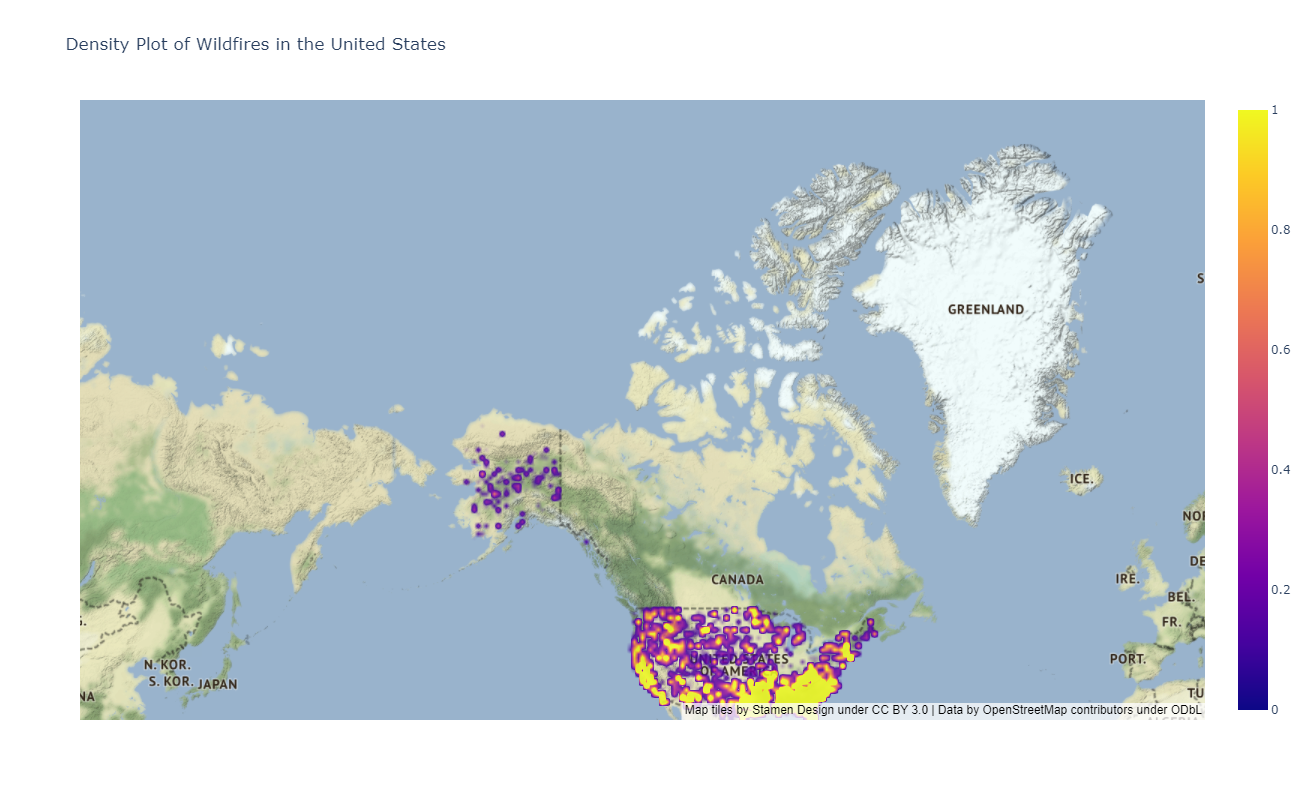

In [243]:
# Create a density plot to show locations
fig = px.density_mapbox(us_wildfires, lat='latitude', lon='longitude', radius=1, center=dict(lat=45, lon=-120),
                 mapbox_style='stamen-terrain', zoom=2.2, title="Density Plot of Wildfires in the United States", opacity=0.85)
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)

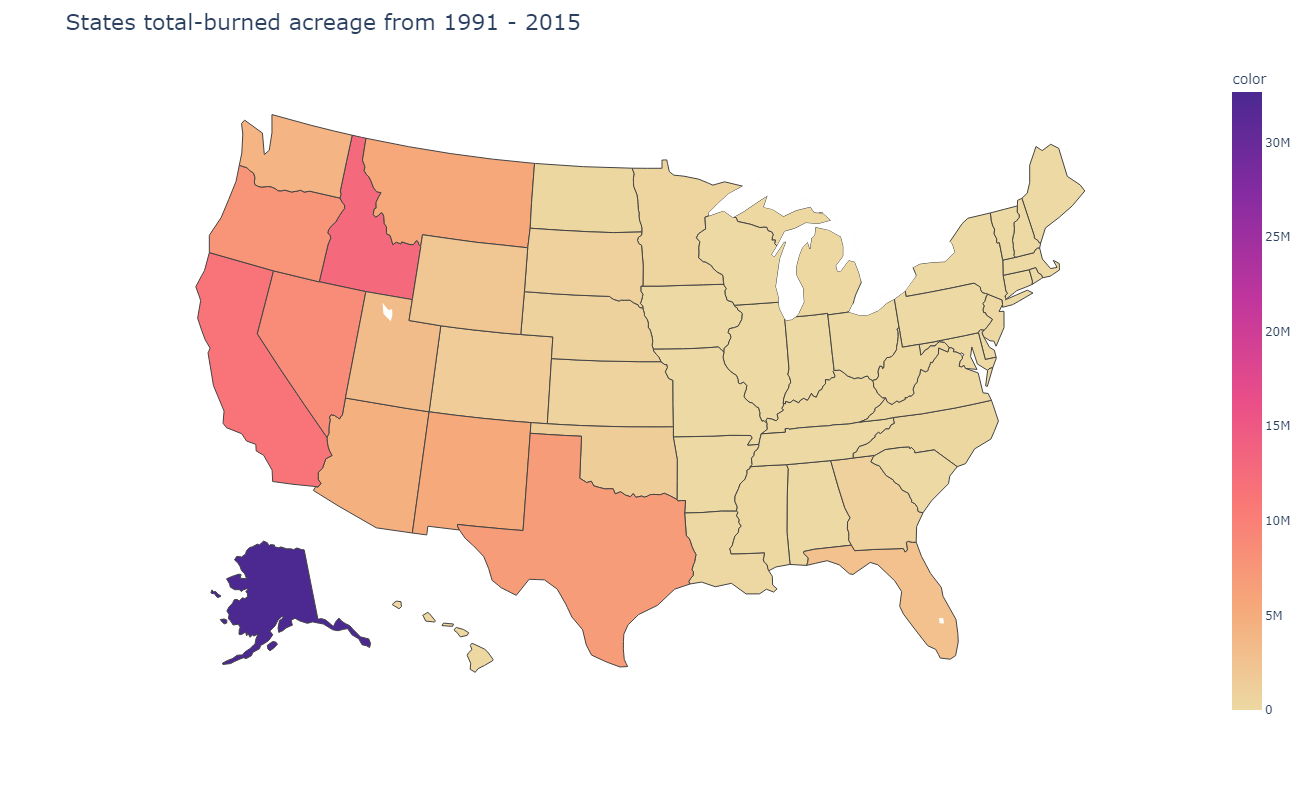

In [329]:
# Build a chloropleth map to showcase the total acreage burned in each state
fig = px.choropleth( 
                   locations=us_wildfires["state"].sort_values().unique(),
                   locationmode="USA-states",
                   color=us_wildfires.groupby(['state'])['fire_size'].sum(),
                   hover_name=us_wildfires['state'].sort_values().unique(),
                   color_continuous_scale = px.colors.sequential.Agsunset_r,
                   scope='usa')

fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
    title="States total-burned acreage from 1991 - 2015",
    title_font_size = 22)

fig.show()

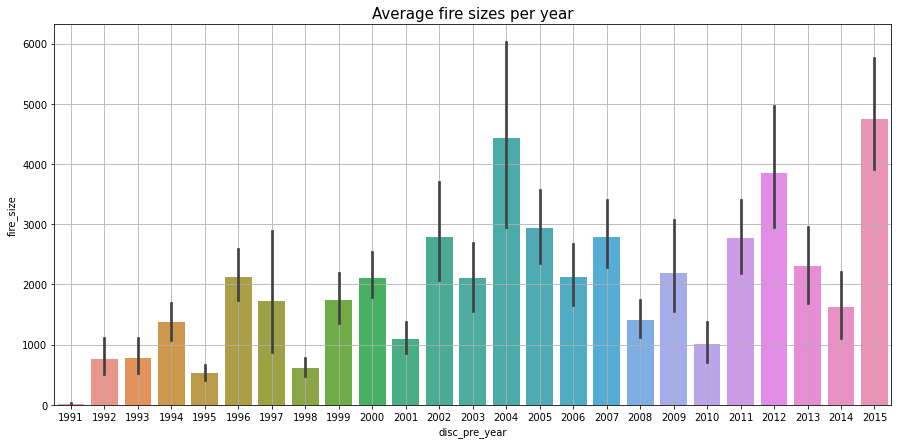

In [10]:
# Number of fires per year from '91 to '15
plt.figure(figsize=(15,7))
sns.barplot(data=us_wildfires, x='disc_pre_year', y='fire_size')
plt.title("Average fire sizes per year", size=15);
plt.grid()

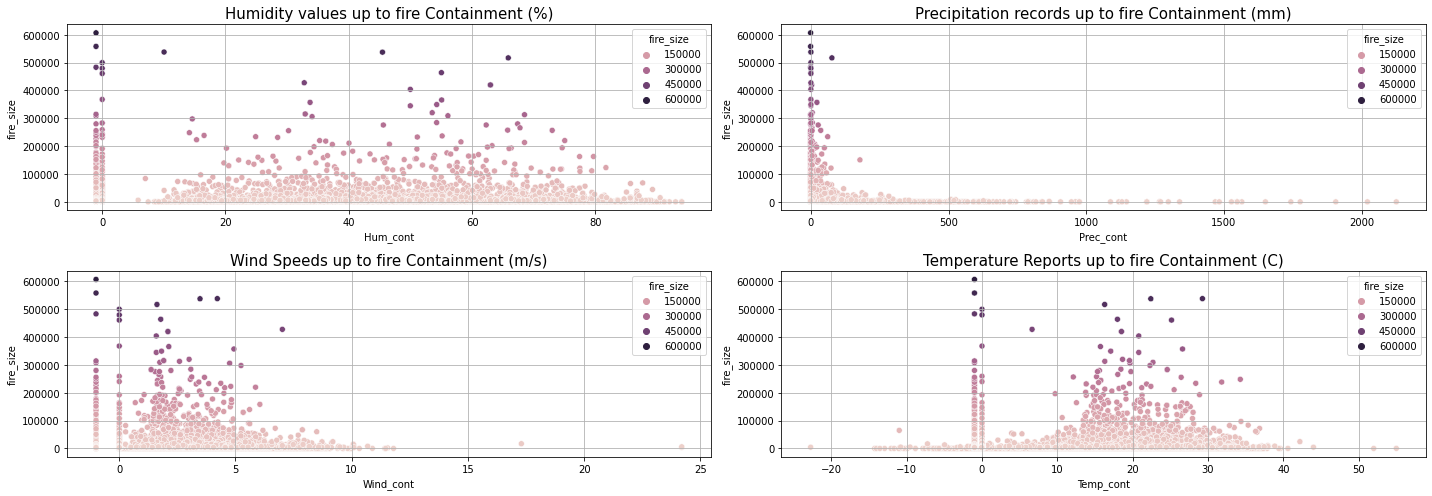

In [11]:
# Create some plots to look at variables impact on fire sizes
# Look at some numerical values versus the target that will be used in the model
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 7))
sns.scatterplot(data=us_wildfires, x='Hum_cont', y='fire_size', hue='fire_size', ax=ax[0,0])
ax[0,0].set_title("Humidity values up to fire Containment (%)", size=15)
ax[0,0].grid()

sns.scatterplot(data=us_wildfires, x='Wind_cont', y='fire_size', hue='fire_size', ax=ax[1,0])
ax[1,0].set_title("Wind Speeds up to fire Containment (m/s)", size=15)
ax[1,0].grid()

sns.scatterplot(data=us_wildfires, x='Prec_cont', y='fire_size', hue='fire_size', ax=ax[0,1])
ax[0,1].set_title("Precipitation records up to fire Containment (mm)", size=15)
ax[0,1].grid()

sns.scatterplot(data=us_wildfires, x='Temp_cont', y='fire_size', hue='fire_size', ax=ax[1,1])
ax[1,1].set_title("Temperature Reports up to fire Containment (C)", size=15)
ax[1,1].grid()
plt.tight_layout()

Notice we have plenty of entries that are missing data since some report values of -1.0.

In [12]:
# Plot the average fire size per vegetation
us_wildfires['Vegetation'] = us_wildfires['Vegetation'].apply(str)

us_wildfires['Vegetation'] = us_wildfires['Vegetation'].map({'12': 'Open Shrubland', '15': 'Polar Desert/Rock/Ice', 
                                                '16': 'Secondary Tropical Evergreen Broadleaf Forest', '4': 'Temperate Evergreen Needleleaf Forest',
                                                '9': 'Grassland/Steppe', '14': 'Desert', '0': 'Not Applicable'})

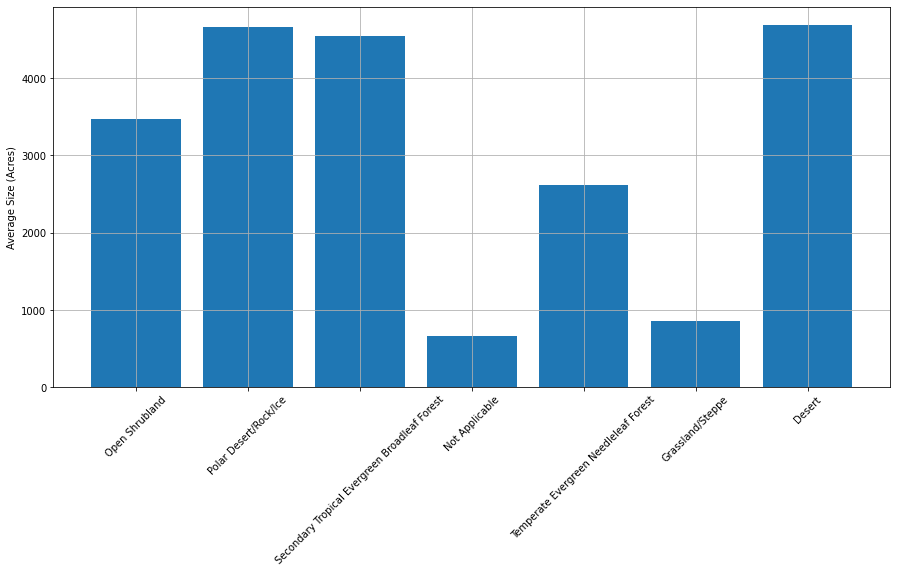

In [13]:
plt.figure(figsize=(15,7))
plt.bar(us_wildfires['Vegetation'].unique(), us_wildfires.groupby(['Vegetation'])['fire_size'].mean())
plt.xticks(rotation=45)
plt.ylabel('Average Size (Acres)')
plt.grid()

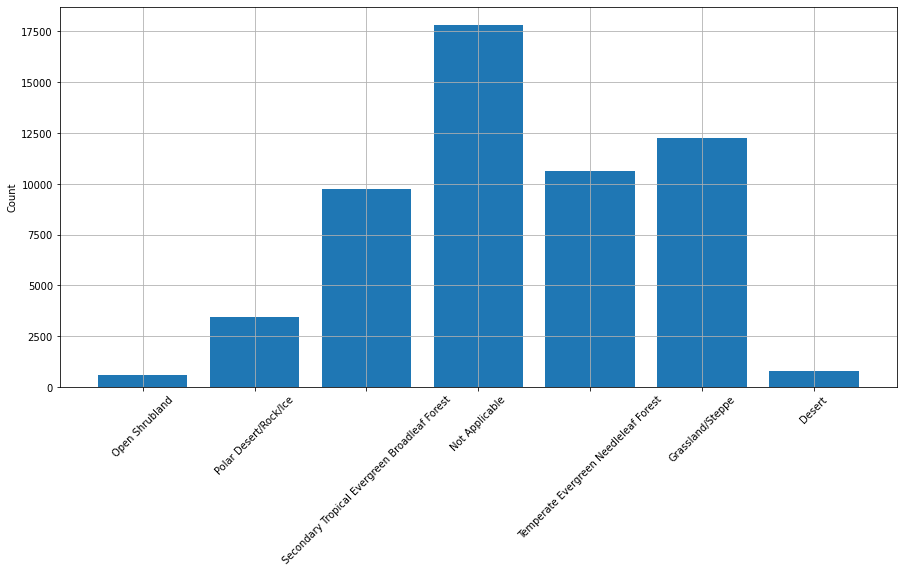

In [14]:
plt.figure(figsize=(15,7))
plt.bar(us_wildfires['Vegetation'].unique(), us_wildfires.groupby(['Vegetation']).size())
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.grid()

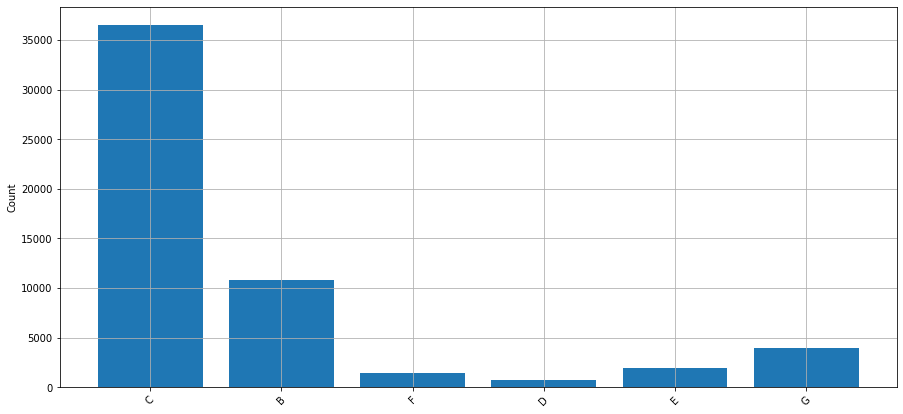

In [15]:
plt.figure(figsize=(15,7))
plt.bar(us_wildfires['fire_size_class'].unique(), us_wildfires.groupby(['fire_size_class']).size())
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.grid()

## Data Cleaning and Preprocessing

In [16]:
# Clean and tailor the data to shrink the dataset and remove heavy outliers, i.e. focus on the smaller, more complete data.
# Also drop ALL rows that have missing values that correspond to the prediction of fire size, i.e. humidity = -1 (cannot happen)
us_wildfires.drop(us_wildfires.index[us_wildfires['Hum_cont'] <= 0], inplace=True)
us_wildfires.drop(us_wildfires.index[us_wildfires['Vegetation'] == 'Not Applicable'], inplace=True)

# Convert Vegetation and State to Categorical
us_wildfires['Vegetation'] = us_wildfires['Vegetation'].astype('category')
us_wildfires['state'] = us_wildfires['state'].astype('category')

# Drop all N/A's, exclude all 'objects', and set a boundary for fire size to reduce outliers
us_wildfires.dropna(axis=1, inplace=True)
wildfires_updated = us_wildfires.select_dtypes(exclude=['object'])

# Look at fires ONLY between the sizes of 10k to 100k in acreage
wildfires_updated = wildfires_updated[(wildfires_updated['fire_size'] < 100000) & (wildfires_updated['fire_size'] > 10000)]

# Reset the index
print(wildfires_updated.shape)
wildfires_updated = wildfires_updated.reset_index(drop=True)
wildfires_updated.columns

(968, 28)


Index(['fire_size', 'latitude', 'longitude', 'state', 'disc_pre_year',
       'dstation_m', 'wstation_wban', 'wstation_byear', 'wstation_eyear',
       'Vegetation', 'fire_mag', 'Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7',
       'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Wind_cont',
       'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont', 'Prec_pre_30',
       'Prec_pre_15', 'Prec_pre_7', 'Prec_cont', 'remoteness'],
      dtype='object')

In [17]:
# Since year other than the initial year isn't an impact on fire growth, lets remove that as well
wildfires_updated.drop(['wstation_byear', 'wstation_eyear', 'fire_mag', 'wstation_wban', 'disc_pre_year', 'latitude', 'longitude',
                       'Temp_pre_30', 'Temp_pre_15', 'Wind_pre_30', 'Wind_pre_15', 'Hum_pre_30', 'Hum_pre_15', 'Prec_pre_30', 'Prec_pre_15'], axis=1, inplace=True)
wildfires_updated.head()

fire_size state   dstation_m             Vegetation  Temp_pre_7  Temp_cont  \
0    19520.0    ID  74419.77606       Grassland/Steppe   21.286573  18.320038   
1    13804.0    NM  65357.19788         Open Shrubland   31.240659  31.901136   
2    67008.0    NM  26725.24288         Open Shrubland   12.034091  16.954545   
3    10137.0    OR  48418.08784  Polar Desert/Rock/Ice   23.662651  19.249169   
4    82440.0    AZ  30992.42437         Open Shrubland   29.711656  32.860643   

   Wind_pre_7  Wind_cont  Hum_pre_7   Hum_cont  Prec_pre_7  Prec_cont  \
0    1.436072   1.341442  50.076152  43.996143         0.0        0.0   
1    2.068132   2.479545  26.780220  21.655303         0.0        0.0   
2    5.215909   7.877273  29.522727  23.727273         0.0        0.0   
3    2.343976   2.453821  37.728916  42.139535         0.0        0.0   
4    3.306790   4.174273  13.580247  20.486983         0.0        6.9   

   remoteness  
0    0.439851  
1    0.370605  
2    0.334021  
3    0.475178  
4    0.405942

<AxesSubplot:xlabel='fire_size', ylabel='Density'>

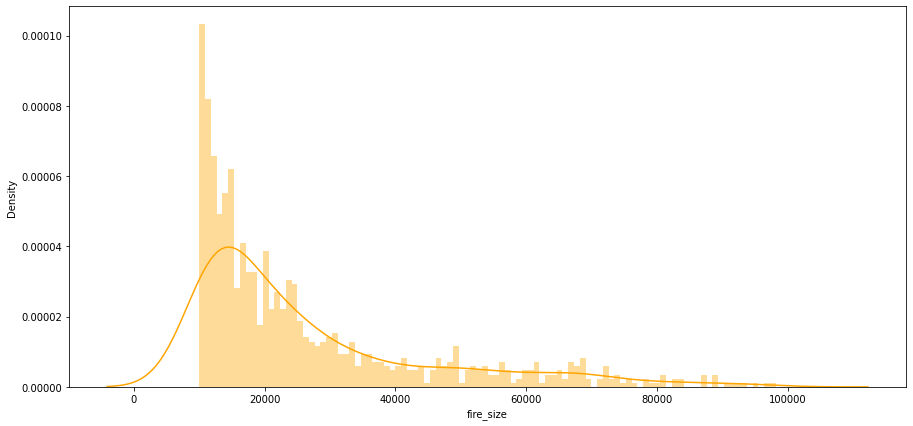

In [18]:
%matplotlib inline
# Create a new plot of the fire size to see how it's changed
plt.figure(figsize=(15,7))
sns.distplot(wildfires_updated['fire_size'], bins=100, color='orange')

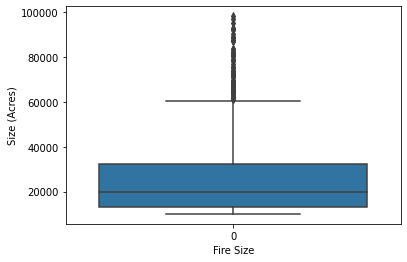

In [19]:
# Create a box plot
sns.boxplot(data=wildfires_updated['fire_size'])
plt.xlabel('Fire Size')
plt.ylabel('Size (Acres)');

<AxesSubplot:xlabel='fire_size', ylabel='Density'>

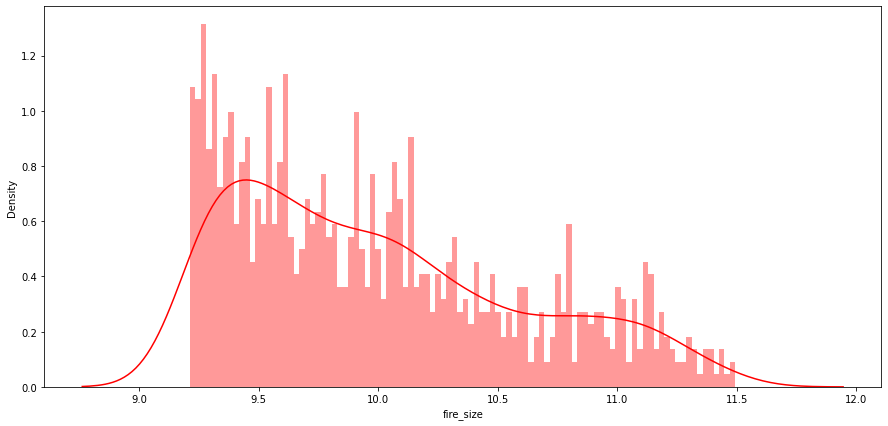

In [20]:
%matplotlib inline
# Create the same plot but with natural log scaling
plt.figure(figsize=(15,7))
sns.distplot(np.log(wildfires_updated['fire_size']), bins=100, color='red')

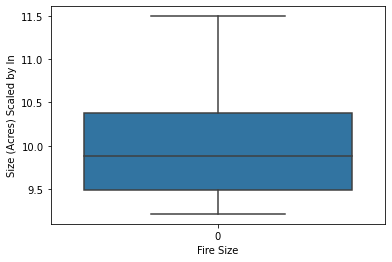

In [21]:
# Create a box plot before scaling
sns.boxplot(data=np.log(wildfires_updated['fire_size']))
plt.xlabel('Fire Size')
plt.ylabel('Size (Acres) Scaled by ln');

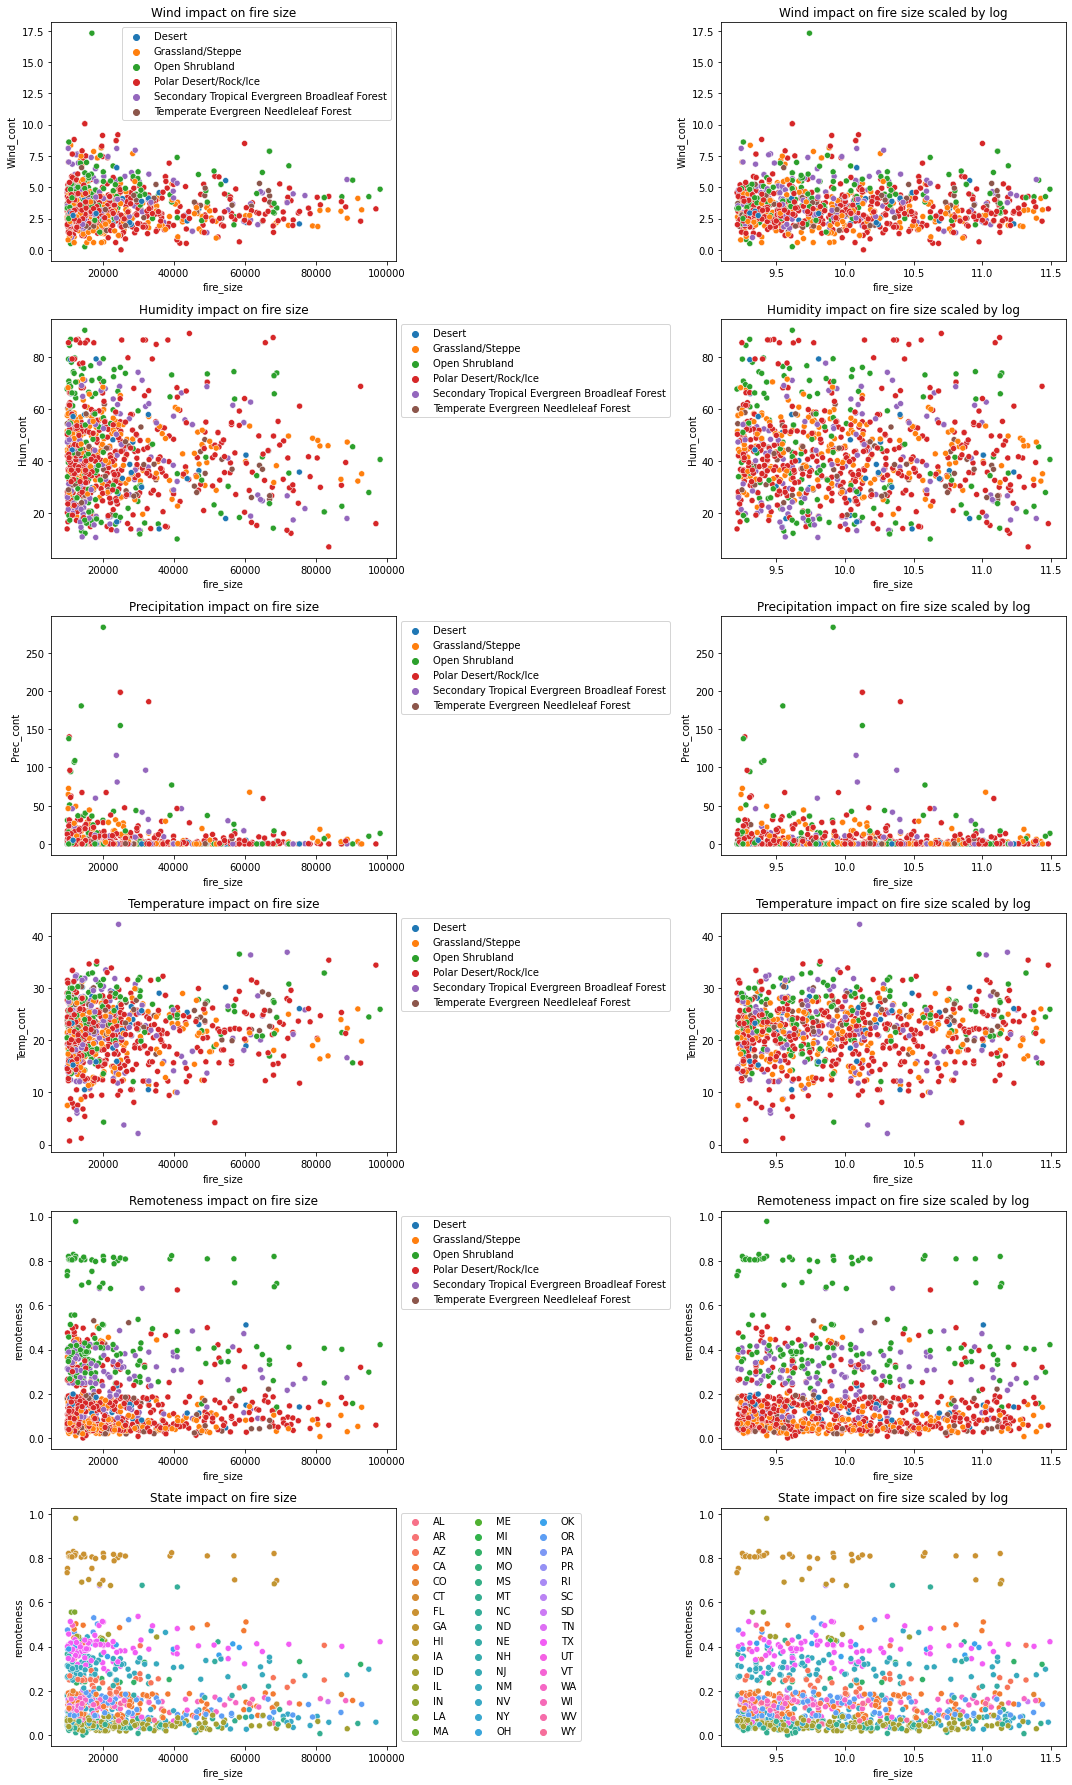

In [22]:
# Create a plot of some attributes using the Vegetation column
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,25))

ax[0,0].set_title('Wind impact on fire size')
ax[0,0] = sns.scatterplot(data=wildfires_updated, x='fire_size', y='Wind_cont', hue='Vegetation', ax=ax[0,0])
ax[0,0].legend(ncol=1, bbox_to_anchor=(1.0, 1.0))

ax[0,1].set_title('Wind impact on fire size scaled by log')
ax[0,1] = sns.scatterplot(data=wildfires_updated, x=np.log(wildfires_updated['fire_size']), y='Wind_cont', hue='Vegetation', ax=ax[0,1], legend=False)

ax[1,0].set_title('Humidity impact on fire size')
ax[1,0] = sns.scatterplot(data=wildfires_updated, x='fire_size', y='Hum_cont', hue='Vegetation', ax=ax[1,0])
ax[1,0].legend(ncol=1, bbox_to_anchor=(1.0, 1.0))

ax[1,1].set_title('Humidity impact on fire size scaled by log')
ax[1,1] = sns.scatterplot(data=wildfires_updated, x=np.log(wildfires_updated['fire_size']), y='Hum_cont', hue='Vegetation', ax=ax[1,1], legend=False)

ax[2,0].set_title('Precipitation impact on fire size')
ax[2,0] = sns.scatterplot(data=wildfires_updated, x='fire_size', y='Prec_cont', hue='Vegetation', ax=ax[2,0])
ax[2,0].legend(ncol=1, bbox_to_anchor=(1.0, 1.0))

ax[2,1].set_title('Precipitation impact on fire size scaled by log')
ax[2,1] = sns.scatterplot(data=wildfires_updated, x=np.log(wildfires_updated['fire_size']), y='Prec_cont', hue='Vegetation', ax=ax[2,1], legend=False)

ax[3,0].set_title('Temperature impact on fire size')
ax[3,0] = sns.scatterplot(data=wildfires_updated, x='fire_size', y='Temp_cont', hue='Vegetation', ax=ax[3,0])
ax[3,0].legend(ncol=1, bbox_to_anchor=(1.0, 1.0))

ax[3,1].set_title('Temperature impact on fire size scaled by log')
ax[3,1] = sns.scatterplot(data=wildfires_updated, x=np.log(wildfires_updated['fire_size']), y='Temp_cont', hue='Vegetation', ax=ax[3,1], legend=False)

ax[4,0].set_title('Remoteness impact on fire size')
ax[4,0] = sns.scatterplot(data=wildfires_updated, x='fire_size', y='remoteness', hue='Vegetation', ax=ax[4,0])
ax[4,0].legend(ncol=1, bbox_to_anchor=(1.0, 1.0))

ax[4,1].set_title('Remoteness impact on fire size scaled by log')
ax[4,1] = sns.scatterplot(data=wildfires_updated, x=np.log(wildfires_updated['fire_size']), y='remoteness', hue='Vegetation', ax=ax[4,1], legend=False)

ax[5,0].set_title('State impact on fire size')
ax[5,0] = sns.scatterplot(data=wildfires_updated, x='fire_size', y='remoteness', hue='state', ax=ax[5,0])
ax[5,0].legend(ncol=3, bbox_to_anchor=(1.0, 1.0))

ax[5,1].set_title('State impact on fire size scaled by log')
ax[5,1] = sns.scatterplot(data=wildfires_updated, x=np.log(wildfires_updated['fire_size']), y='remoteness', hue='state', ax=ax[5,1], legend=False)

plt.tight_layout()

In [23]:
# In order to instantiate both state and vegetation, we have to encode them via label encoder
wildfires_updated.sort_values(['state'], inplace=True)
wildfires_updated.reset_index(drop=True, inplace=True)

label = LabelEncoder()
wildfires_updated['State'] = label.fit_transform(wildfires_updated['state'])
wildfires_updated['Fuel'] = label.fit_transform(wildfires_updated['Vegetation'])

wildfires_updated.drop(['state','Vegetation'], axis=1, inplace=True)

In [24]:
wildfires_updated.describe()

fire_size     dstation_m  Temp_pre_7   Temp_cont  Wind_pre_7  \
count    968.000000     968.000000  968.000000  968.000000  968.000000   
mean   26507.525258   53964.597300   21.675945   21.621533    3.306711   
std    18610.013117   27831.722350    6.343980    5.779437    1.341112   
min    10022.000000     762.502395   -7.959788    0.677989    0.000000   
25%    13246.250000   33513.671375   18.653838   18.091479    2.392681   
50%    19630.000000   51645.134025   22.573082   21.963853    3.172697   
75%    32218.500000   69930.816537   25.773684   25.393519    4.091533   
max    98168.000000  173964.627400   38.236686   42.200000    7.576457   

        Wind_cont   Hum_pre_7    Hum_cont  Prec_pre_7   Prec_cont  remoteness  \
count  968.000000  968.000000  968.000000  968.000000  968.000000  968.000000   
mean     3.584720   40.328935   42.417608    1.911674    6.928719    0.194709   
std      1.627294   16.775148   16.306383   12.010137   21.393757    0.179913   
min      0.000000    0.000000    7.000000    0.000000    0.000000    0.000941   
25%      2.502960   29.098371   30.903262    0.000000    0.000000    0.062672   
50%      3.333904   38.707670   41.084518    0.000000    0.000000    0.141534   
75%      4.397572   49.820454   52.040979    0.000000    4.400000    0.274201   
max     17.300000   89.455357   90.500000  245.600000  283.200000    0.978719   

            State        Fuel  
count  968.000000  968.000000  
mean    11.533058    2.598140  
std      7.326408    1.209526  
min      0.000000    0.000000  
25%      6.000000    2.000000  
50%     14.000000    3.000000  
75%     17.000000    3.000000  
max     23.000000    5.000000

In [25]:
wildfires_updated.head()

fire_size    dstation_m  Temp_pre_7  Temp_cont  Wind_pre_7  Wind_cont  \
0    22092.0   40840.46657   25.738298  27.554348    3.553191   2.689130   
1    13057.0   63877.68095   30.965143  30.255983    4.712791   5.000717   
2    22077.0   11571.10963   20.876494  24.420930    4.747410   4.246698   
3    68079.0   32295.77758   24.484615  27.547303    3.684615   3.009267   
4    11927.0  122714.38630   38.236686  31.248120    3.164497   3.059398   

   Hum_pre_7   Hum_cont  Prec_pre_7  Prec_cont  remoteness  State  Fuel  
0  31.297872  38.021739         0.0        3.0    0.209475      0     4  
1  12.656977  29.390244         0.3       36.8    0.251920      0     2  
2  14.153386  15.820000         0.0        0.0    0.188938      0     4  
3  13.988166  14.206086         0.0        0.0    0.259759      0     2  
4  14.899408  44.240601         0.0        7.6    0.439570      0     3

In [26]:
# Now time to scale using StandardScalar()
scaler = StandardScaler()
target  = np.log(wildfires_updated['fire_size'])
wildfire = wildfires_updated.loc[:, wildfires_updated.columns != 'fire_size']
wildfires_scaled = pd.DataFrame(scaler.fit_transform(wildfire), columns=wildfire.columns)

# Display - Now left with only features that lead up to fire ignition and fire growth (location, temp, wind, humidity, precip, and remoteness)
wildfires_scaled.head()

dstation_m  Temp_pre_7  Temp_cont  Wind_pre_7  Wind_cont  Hum_pre_7  \
0   -0.471797    0.640679   1.027069    0.183883  -0.550640  -0.538638   
1    0.356363    1.465011   1.494767    1.048985   0.870605  -1.650433   
2   -1.523995   -0.126082   0.484622    1.074812   0.407007  -1.561183   
3   -0.778968    0.442959   1.025850    0.281930  -0.353809  -1.571037   
4    2.471472    2.611815   1.666523   -0.106097  -0.322986  -1.516688   

   Hum_cont  Prec_pre_7  Prec_cont  remoteness    State      Fuel  
0 -0.269719   -0.159254  -0.183733    0.082116 -1.57499  1.159614  
1 -0.799325   -0.134262   1.396983    0.318157 -1.57499 -0.494780  
2 -1.631959   -0.159254  -0.324034   -0.032090 -1.57499  1.159614  
3 -1.730985   -0.159254  -0.324034    0.361755 -1.57499 -0.494780  
4  0.111854   -0.159254   0.031394    1.361699 -1.57499  0.332417

## Modeling

In [27]:
# Split the data
X = wildfires_scaled
y = target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lst = [X_train, X_test, y_train, y_test]
for size in lst:
    print(size.shape)

(726, 12)
(242, 12)
(726,)
(242,)


### Base Linear Regression

In [28]:
# Start with a base, use OLS
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict both train and test
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Display the mse/rmse
train_scores = mean_squared_error(y_train, y_pred_train) 
test_scores = mean_squared_error(y_test, y_pred_test)

print(f"Train RMSE: {np.sqrt(train_scores)} | Test RMSE: {np.sqrt(test_scores)}")
print(f"Train Score: {round(lr.score(X_train, y_train), 5)} | Test Score: {round(lr.score(X_test, y_test), 5)}")

Train RMSE: 0.580492282250897 | Test RMSE: 0.6221411323223242
Train Score: 0.0279 | Test Score: -0.04191


In [29]:
# Create an OLS model
y = target
feature_matrix = sm.add_constant(wildfires_scaled, prepend=False)

# Fit and summarize OLS model
model = sm.OLS(y, feature_matrix)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              fire_size   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.288
Date:                Sun, 29 May 2022   Prob (F-statistic):              0.220
Time:                        10:57:12   Log-Likelihood:                -862.15
No. Observations:                 968   AIC:                             1750.
Df Residuals:                     955   BIC:                             1814.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dstation_m     0.0154      0.020      0.781      0.4

Text(0.5, 1.0, 'Residuals from OLS')

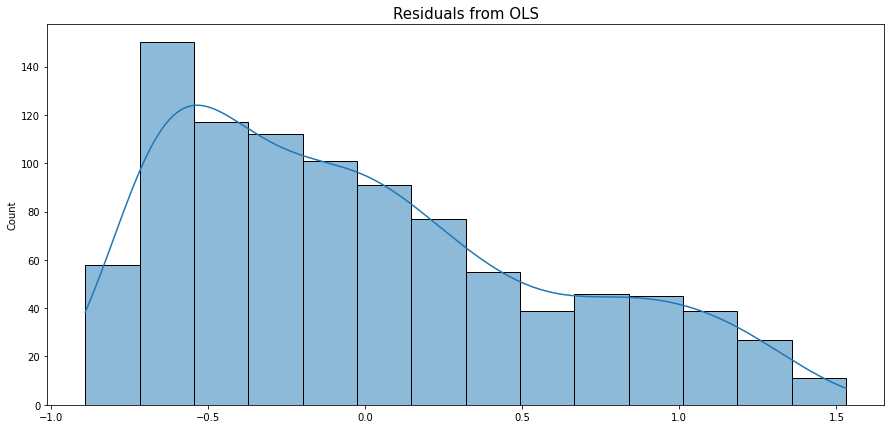

In [30]:
# Create a histogram of the residuals
plt.figure(figsize=(15,7))
sns.histplot(res.resid, kde=True);
plt.title("Residuals from OLS", size=15)

### Support Vector Regressor (SVR)

In [31]:
# Instantiate both a SVR and kNN Regressor model, starting with the SVR without any modifications to its parameters
svr = SVR()
svr.fit(X_train, y_train)

# Predict both train and test
y_pred_train_svr = svr.predict(X_train)
y_pred_test_svr = svr.predict(X_test)

# Display the mse/rmse
train_scores_svr = mean_squared_error(y_train, y_pred_train_svr) 
test_scores_svr = mean_squared_error(y_test, y_pred_test_svr)

print(f"Train RMSE: {np.sqrt(train_scores_svr)}")
print(f"Test RMSE: {np.sqrt(test_scores_svr)}")

Train RMSE: 0.519887972611718
Test RMSE: 0.6473913684262864


Some overfitting is present in the SVR model.

### K-Nearest Neighbors Regressor (kNN-R)

In [32]:
# Now implement the kNN Regressor without any modifications to its parameters
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# Predict both train and test
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

# Display the mse/rmse
train_scores_knn = mean_squared_error(y_train, y_pred_train_knn) 
test_scores_knn = mean_squared_error(y_test, y_pred_test_knn)

print(f"Train RMSE: {np.sqrt(train_scores_knn)}")
print(f"Test RMSE: {np.sqrt(test_scores_knn)}")

Train RMSE: 0.5303210020316212
Test RMSE: 0.6805127272117203


Even more overfitting appears in the kNN-R model.

## Tuning

In [140]:
# Apply GridSearchCV to tune the parameters of both models, compare results and establish conclusions
svr_params = [{
              'kernel': ['rbf', 'linear'], 
              'C': [10, 50, 100, 110, 120],
              'epsilon': [0.001, 0.01, 0.1]
              }]

# 'epsilon': [0.001, 0.01, 0.1]
knn_params = [{
                "n_neighbors": range(20, 90)
                }]

In [141]:
# Re-instantiate
svr = SVR()
knn = KNeighborsRegressor()

# Enable grid search
svr_grid = GridSearchCV(
                        estimator=svr, 
                        param_grid=svr_params,
                        scoring='neg_root_mean_squared_error',
                        cv=10,
                        return_train_score=True
                       )

knn_grid = GridSearchCV(
                        estimator=knn, 
                        param_grid=knn_params, 
                        scoring='neg_root_mean_squared_error', 
                        cv=10, 
                        return_train_score=True
                       )

In [142]:
%time
# Fit the svr
svr_grid.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.06 µs


GridSearchCV(cv=10, estimator=SVR(),
             param_grid=[{'C': [10, 50, 100, 110, 120],
                          'epsilon': [0.001, 0.01, 0.1],
                          'kernel': ['rbf', 'linear']}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [143]:
%time
# Fit the knn
knn_grid.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15.5 µs


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': range(20, 90)}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [146]:
# Best estimator for svr - NOTE: THIS PART TAKES ROUGHLY 10-15 MINUTES TO RUN
print("Best Estimator:", svr_grid.best_estimator_)

# Best parameters for svr
print("Best Parameters:", svr_grid.best_params_)

Best Estimator: SVR(C=110, kernel='linear')
Best Parameters: {'C': 110, 'epsilon': 0.1, 'kernel': 'linear'}


In [145]:
# Best estimator for knn
print("Best Estimator:", knn_grid.best_estimator_)

# Best parameters for knn
print("Best Parameters:", knn_grid.best_params_)

Best Estimator: KNeighborsRegressor(n_neighbors=82)
Best Parameters: {'n_neighbors': 82}


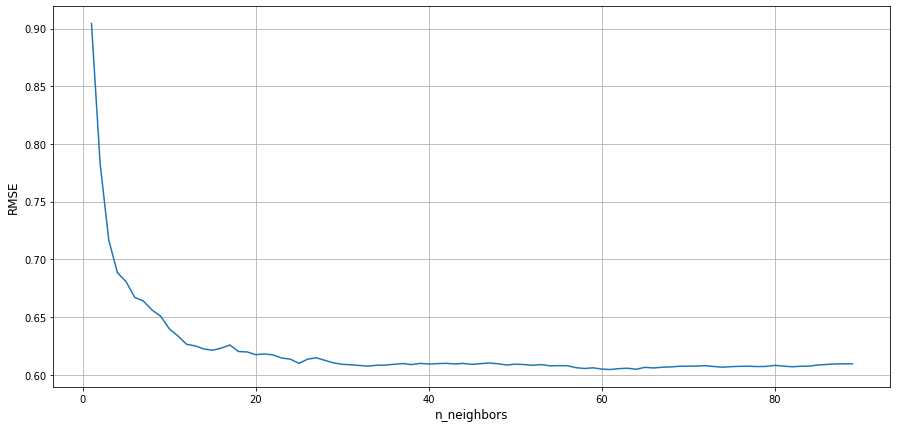

In [320]:
rmses = {}
plt.figure(figsize=(15, 7))

# Plot of neighbor values, verify the GridSearch result
for x in range(1, 90):
    knn_test = KNeighborsRegressor(n_neighbors=x, n_jobs=-1)
    knn_test.fit(X_train, y_train)
    knn_y_pred = knn_test.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, knn_y_pred))
    rmses[x] = rmse_test
    
plt.plot(rmses.keys(), rmses.values())
plt.xlabel('n_neighbors', size=12)
plt.ylabel('RMSE', size=12)
plt.grid()

In [167]:
# Based off the loop, this is the mimimum rmse
min(rmses, key=rmses.get)

61

GridSearchCV returned the best estimator for n_neighbors to be 82 but 61 is lower.

## Evaluation

### SVR

In [321]:
# Now run the test data on the best-optimized models
svr_final = SVR(C=svr_grid.best_params_["C"], 
                epsilon=svr_grid.best_params_["epsilon"], kernel=svr_grid.best_params_["kernel"])
svr_final.fit(X_train, y_train)

# Predict both train and test
y_final_train_svr = svr_final.predict(X_train)
y_final_test_svr = svr_final.predict(X_test)

# Display the mse/rmse
train_final_svr = mean_squared_error(y_train, y_final_train_svr) 
test_final_svr = mean_squared_error(y_test, y_final_test_svr)

print(f"Train RMSE: {np.sqrt(train_final_svr)}")
print(f"Test RMSE: {np.sqrt(test_final_svr)}")

Train RMSE: 0.5926422408979913
Test RMSE: 0.6401082869139947


### kNN-R

In [322]:
# Now run the test data on the best-optimized models
knn_final = KNeighborsRegressor(n_neighbors=knn_grid.best_params_['n_neighbors'], n_jobs=-1)
knn_final.fit(X_train, y_train)

# Predict both train and test
y_final_train_knn = knn_final.predict(X_train)
y_final_test_knn = knn_final.predict(X_test)

# Display the mse/rmse
train_final_knn = mean_squared_error(y_train, y_final_train_knn) 
test_final_knn = mean_squared_error(y_test, y_final_test_knn)

print(f"Train RMSE: {np.sqrt(train_final_knn)}")
print(f"Test RMSE: {np.sqrt(test_final_knn)}")

Train RMSE: 0.584324540759098
Test RMSE: 0.60682988077464


## Comparison

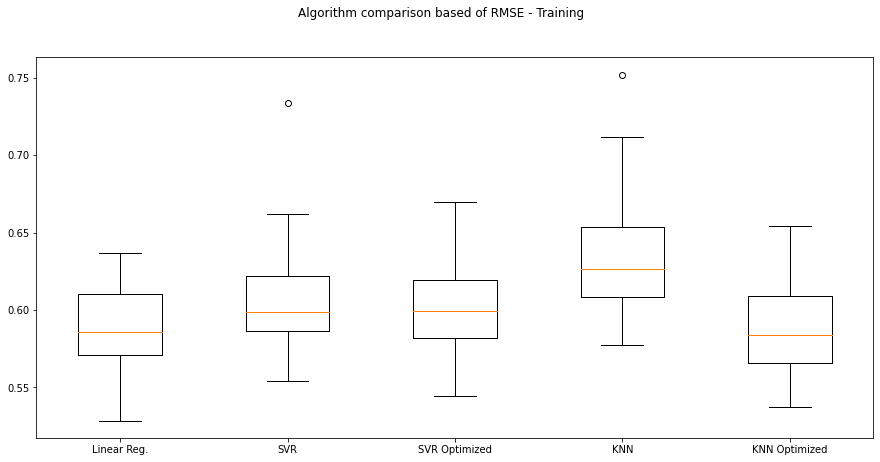

In [331]:
# Now that we've found the best models, compare them
results, names, models = [], [], [("Linear Reg.", lr), ("SVR", svr), 
                                  ("SVR Optimized", svr_final), ("KNN", knn), ("KNN Optimized", knn_final)]

# Loop that calculates RMSE for all models
scoring = 'neg_root_mean_squared_error'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(-cv_results)
	names.append(name)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm comparison based of RMSE - Training')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [332]:
# Create a pretty table
wildfire_models = PrettyTable(['Model', 'RMSE'], sortby='RMSE')
for x, y in zip(models, results):
    wildfire_models.add_row([x[0], round(y.mean(), 4)])
    
wildfire_models

+---------------+--------+
|     Model     |  RMSE  |
+---------------+--------+
|  Linear Reg.  | 0.5876 |
| KNN Optimized | 0.5891 |
| SVR Optimized | 0.6031 |
|      SVR      | 0.6126 |
|      KNN      | 0.6419 |
+---------------+--------+